In [1]:
class SVM():
    def __init__(self, lr=0.001, lambda_params=0.01, n_iters=1000):
        self.lr = lr
        self.lambda_params = lambda_params
        self.n_iters = n_iters
        self.w = None
        self.b = None
        
    def fit(self, X, y):
        y_ = np.where(y <=0, -1, 1)
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 *self.lambda_params * self.w)
                else:
                    self.w -= self.lr * (2 *self.lambda_params * self.w - np.dot(x_i , y_[idx]))
                    self.b -= self.lr * y_[idx]
        
            
    def predict(self, X):
        linear_output = np.dot(X, self.w) + self.b
        return np.sign(linear_output)
    
    

In [12]:
np.where(y <=0, -1, 1)

array([ 1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,
        1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1])

In [ ]:
np.sign()

In [3]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y ==0 , -1, 1 )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


In [5]:
clf = SVM()
clf.fit(X,y)


In [6]:
print(clf.w, clf.b)

[0.58977016 0.17946483] -0.1520000000000001


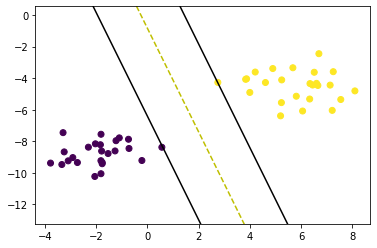

In [7]:
def visualize_svm():
     def get_hyperplane_value(x, w, b, offset):
          return (-w[0] * x + b + offset) / w[1]

     fig = plt.figure()
     ax = fig.add_subplot(1,1,1)
     plt.scatter(X[:,0], X[:,1], marker='o',c=y)

     x0_1 = np.amin(X[:,0])
     x0_2 = np.amax(X[:,0])

     x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
     x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

     x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
     x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

     x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
     x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

     ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
     ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
     ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

     x1_min = np.amin(X[:,1])
     x1_max = np.amax(X[:,1])
     ax.set_ylim([x1_min-3,x1_max+3])

     plt.show()

visualize_svm()


In [8]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [9]:
y_pred = classifier.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


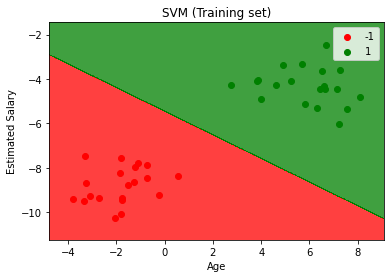

In [11]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()